In [2]:
import pandas as pd
import openpyxl as xl

In [3]:
dataset=pd.ExcelFile("Iris.xls")

In [4]:
print(dataset.sheet_names)

['Iris']


In [5]:
df=dataset.parse("Iris")

In [6]:
df.head()

,sepal length,sepal width,petal length,petal width,iris,Unnamed: 5,Unnamed: 6,sepal length.1,Unnamed: 8
0,5.1,3.5,1.4,0.2,Iris-setosa,NaN,NaN,Count,150.000000
1,4.9,3.0,1.4,0.2,Iris-setosa,NaN,NaN,Minimum,4.300000
2,4.7,3.2,1.3,0.2,Iris-setosa,NaN,NaN,Maximum,7.900000
3,4.6,3.1,1.5,0.2,Iris-setosa,NaN,NaN,Mean,5.843333
4,5.0,3.6,1.4,0.2,Iris-setosa,NaN,NaN,Median,5.800000


In [7]:
df.tail()

,sepal length,sepal width,petal length,petal width,iris,Unnamed: 5,Unnamed: 6,sepal length.1,Unnamed: 8
145,6.7,3.0,5.2,2.3,Iris-virginica,NaN,NaN,NaN,NaN
146,6.3,2.5,5.0,1.9,Iris-virginica,NaN,NaN,NaN,NaN
147,6.5,3.0,5.2,2.0,Iris-virginica,NaN,NaN,NaN,NaN
148,6.2,3.4,5.4,2.3,Iris-virginica,NaN,NaN,NaN,NaN
149,5.9,3.0,5.1,1.8,Iris-virginica,NaN,NaN,NaN,NaN


In [8]:
X = df.iloc[:,[0,1,2,3,4]]

In [9]:
X.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plot
import seaborn as sns

In [13]:
sns.set()

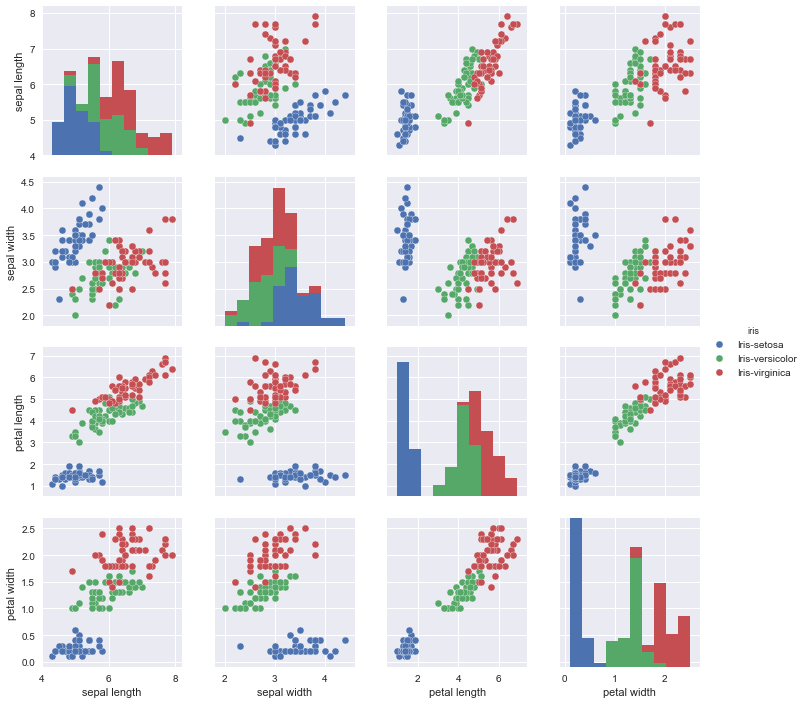

In [14]:
sns.pairplot(X,hue="iris")
plot.show()

In [30]:
from sklearn.cluster import KMeans
#Penetuan K terbaik dengan Eilbow
P = X.iloc[:,[0,1,2,3]]


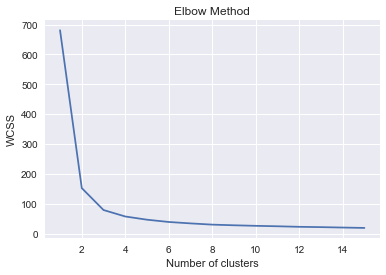

In [31]:
wcss = []
for i in range(1,16):#banyak cluster yang inngin di coba dalam kasus ini dari 1-16
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 0)
    kmeans.fit(P)
    wcss.append(kmeans.inertia_) #Inertia is Sum of squared distances of samples to their closest cluster center.

#Plot Eilbow    
plot.plot(range(1,16),wcss)
plot.title('Elbow Method')
plot.xlabel('Number of clusters')
plot.ylabel('WCSS')
plot.show()

In [32]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
kmeans.fit(P)
y=kmeans.fit_predict(P)
kmeans.cluster_centers_ #centroid di setiap cluster

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [43]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [40]:
df = pd.DataFrame(P)
# and add the Y
df['y'] = y

# split df into cluster groups
grouped = df.groupby(['y'], sort=True)

In [34]:
df.head()

,sepal length,sepal width,petal length,petal width,y
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
